In [1]:
!pip install pandas
!pip install basic-image-eda
!pip install scikit-image
!pip install matplotlib
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
train = pd.read_csv('data/train/train1A_relabeled.csv') # reading the csv file

In [3]:
train.head() # printing first five rows of the file

,name,upperLength,clothesStyles,hairStyles,upperBlack,upperBrown,upperBlue,upperGreen,upperGray,upperOrange,upperPink,upperPurple,upperRed,upperWhite,upperYellow
0,img_qh_train1A_00000000076.jpg,ShortSleeve,Solidcolor,Short,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,img_qh_train1A_00001004361.jpg,LongSleeve,Solidcolor,Short,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,img_qh_train1A_00002008174.jpg,LongSleeve,Solidcolor,Long,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,img_qh_train1A_00003006632.jpg,LongSleeve,multicolour,Long,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN
4,img_qh_train1A_00004001877.jpg,ShortSleeve,Solidcolor,Short,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [4]:
train.columns

Index(['name', 'upperLength', 'clothesStyles', 'hairStyles', 'upperBlack',
       'upperBrown', 'upperBlue', 'upperGreen', 'upperGray', 'upperOrange',
       'upperPink', 'upperPurple', 'upperRed', 'upperWhite', 'upperYellow'],
      dtype='object')

upperLength: 
NoSleeve          9
ShortSleeve     988
LongSleeve     3003
Name: upperLength, dtype: int64


<AxesSubplot:>

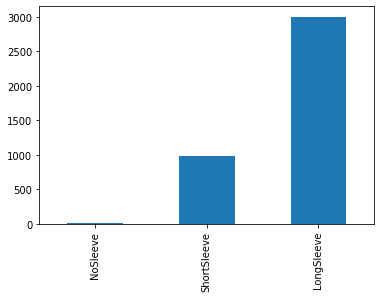

In [5]:
# print(train.groupby('upperLength').count()['name'])
# train['upperLength'].hist()
print('upperLength: ')
print(train['upperLength'].value_counts(ascending=True))
train['upperLength'].value_counts(ascending=True).plot.bar()

clothesStyles: 
lattice         107
multicolour     986
Solidcolor     2907
Name: clothesStyles, dtype: int64


<AxesSubplot:>

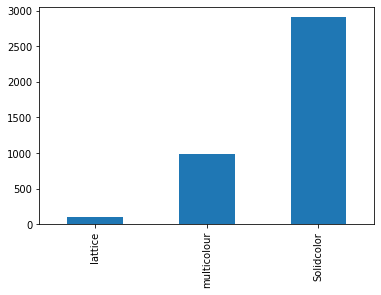

In [6]:
# print(train.groupby('clothesStyles').count()['name'])
# train['clothesStyles'].hist()

print('clothesStyles: ')
print(train['clothesStyles'].value_counts(ascending=True))
train['clothesStyles'].value_counts(ascending=True).plot.bar()

hairStyles: 
Bald         7
middle     409
Long      1620
Short     1964
Name: hairStyles, dtype: int64


<AxesSubplot:>

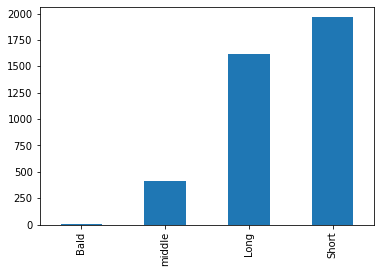

In [7]:
# print(train.groupby('hairStyles').count()['name'])
# train['hairStyles'].hist()

print('hairStyles: ')
print(train['hairStyles'].value_counts(ascending=True))
train['hairStyles'].value_counts(ascending=True).plot.bar()

upperOrange      67
upperPurple     116
upperBrown      120
upperGreen      125
upperYellow     174
upperRed        206
upperPink       213
upperBlue       343
upperGray       739
upperWhite     1476
upperBlack     1626
dtype: int64


<AxesSubplot:>

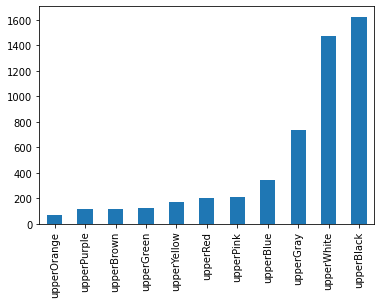

In [8]:
new_df = train.copy(deep=True)
new_df.pop('name')
new_df.pop('upperLength')
new_df.pop('clothesStyles')
new_df.pop('hairStyles')
uppercolorsCount = new_df.count().sort_values()
print(uppercolorsCount)
uppercolorsCount.plot.bar()

In [9]:
clothesStyles_group = train.groupby('clothesStyles').count()
clothesStyles_group.head()

,name,upperLength,hairStyles,upperBlack,upperBrown,upperBlue,upperGreen,upperGray,upperOrange,upperPink,upperPurple,upperRed,upperWhite,upperYellow
clothesStyles,,,,,,,,,,,,,,
Solidcolor,2907,2907,2907,929,60,203,75,406,43,143,78,123,746,101
lattice,107,107,107,78,6,7,1,29,0,4,0,9,85,3
multicolour,986,986,986,619,54,133,49,304,24,66,38,74,645,70


upperOrange      43
upperBrown       60
upperGreen       75
upperPurple      78
upperYellow     101
upperRed        123
upperPink       143
upperBlue       203
upperGray       406
upperWhite      746
upperBlack      929
name           2907
upperLength    2907
hairStyles     2907
Name: Solidcolor, dtype: int64


<AxesSubplot:>

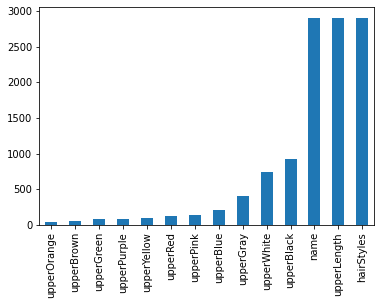

In [10]:
print(clothesStyles_group.loc['Solidcolor'].sort_values())
clothesStyles_group.loc['Solidcolor'].sort_values().plot.bar()

upperOrange     24
upperPurple     38
upperGreen      49
upperBrown      54
upperPink       66
upperYellow     70
upperRed        74
upperBlue      133
upperGray      304
upperBlack     619
upperWhite     645
name           986
upperLength    986
hairStyles     986
Name: multicolour, dtype: int64


<AxesSubplot:>

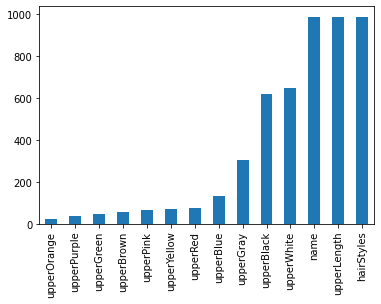

In [11]:
print(clothesStyles_group.loc['multicolour'].sort_values())
clothesStyles_group.loc['multicolour'].sort_values().plot.bar()

upperOrange      0
upperPurple      0
upperGreen       1
upperYellow      3
upperPink        4
upperBrown       6
upperBlue        7
upperRed         9
upperGray       29
upperBlack      78
upperWhite      85
name           107
upperLength    107
hairStyles     107
Name: lattice, dtype: int64


<AxesSubplot:>

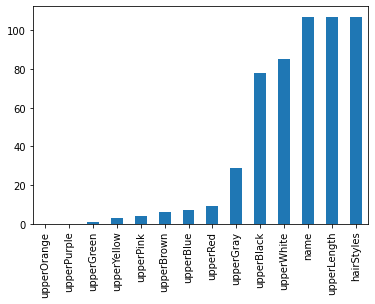

In [12]:
print(clothesStyles_group.loc['lattice'].sort_values())
clothesStyles_group.loc['lattice'].sort_values().plot.bar()

In [13]:
color_count_df = train.copy(deep=True)
colors = ['upperBlack',
       'upperBrown', 'upperBlue', 'upperGreen', 'upperGray', 'upperOrange',
       'upperPink', 'upperPurple', 'upperRed', 'upperWhite', 'upperYellow']
def apply_color_count(series):
    count = 0
    for i in colors:
        if series[i] > 0:
            count = count + 1
    return count

color_count_df["color_count"] = color_count_df.apply(apply_color_count, axis=1)

color_count_df = color_count_df.drop(['upperLength', 'hairStyles', 'upperBlack',
       'upperBrown', 'upperBlue', 'upperGreen', 'upperGray', 'upperOrange',
       'upperPink', 'upperPurple', 'upperRed', 'upperWhite', 'upperYellow'], axis=1)

color_count_df.head()

,name,clothesStyles,color_count
0,img_qh_train1A_00000000076.jpg,Solidcolor,1
1,img_qh_train1A_00001004361.jpg,Solidcolor,1
2,img_qh_train1A_00002008174.jpg,Solidcolor,1
3,img_qh_train1A_00003006632.jpg,multicolour,2
4,img_qh_train1A_00004001877.jpg,Solidcolor,1


In [14]:
for index, row in color_count_df.iterrows():
    if row['clothesStyles'] == 'Solidcolor' and row['color_count'] > 1:
        print('[error label Solidcolor] name: ', row['name'])
    if row['clothesStyles'] == 'lattice' and row['color_count'] < 2:
        print('[error label lattice] name: ', row['name'])
    if row['clothesStyles'] == 'multicolour' and row['color_count'] < 2:
        print('[error label multicolour] name: ', row['name'])

In [15]:
color_frequency_df = color_count_df.copy(deep=True)
def apply_color_frequency_item(series, frequency):
    if series['color_count'] == frequency:
        return 1
    else:
        return 0

color_frequency_df["one"] = color_frequency_df.apply(apply_color_frequency_item, args=(1,), axis=1)
color_frequency_df["two"] = color_frequency_df.apply(apply_color_frequency_item, args=(2,), axis=1)
color_frequency_df["three"] = color_frequency_df.apply(apply_color_frequency_item, args=(3,), axis=1)

color_frequency_df = color_frequency_df.drop(['name', 'color_count'], axis=1)
color_frequency_df.head()

,clothesStyles,one,two,three
0,Solidcolor,1,0,0
1,Solidcolor,1,0,0
2,Solidcolor,1,0,0
3,multicolour,0,1,0
4,Solidcolor,1,0,0


In [16]:
color_frequency_df = color_frequency_df.groupby('clothesStyles').sum()
color_frequency_df.head()

,one,two,three
clothesStyles,,,
Solidcolor,2907,0,0
lattice,0,99,8
multicolour,0,882,104


<AxesSubplot:xlabel='clothesStyles'>

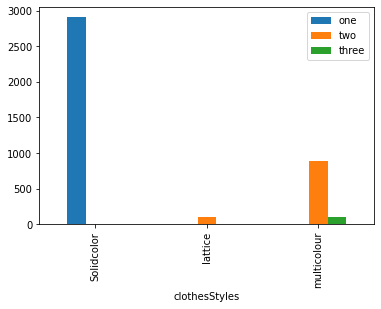

In [17]:
color_frequency_df.plot.bar()


found 4000 images.
Using 8 threads. (max:8)



100%|██████████| 4000/4000 [00:03<00:00, 1038.76it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  4000

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  102
max height                               |  650
mean height                              |  276.5775
median height                            |  252

min width                                |  34
max width                                |  466
mean width                               |  111.763
median width                             |  100

mean height/width ratio                  |  2.4746785608832975
median height/width ratio                |  2.52
recommended input size(by mean)          |  [280 112] (h x w, multiples of 8)
recommended input size(by mean)          |  [272 112] (h x w, multiples of 16)
recommended input size(by mean)          |  [2

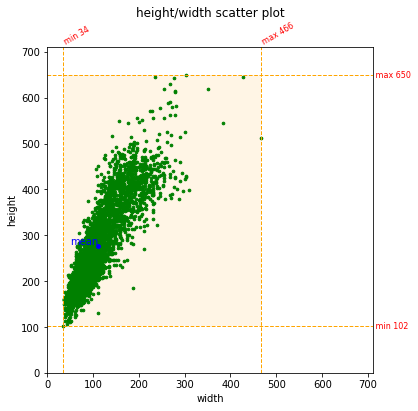

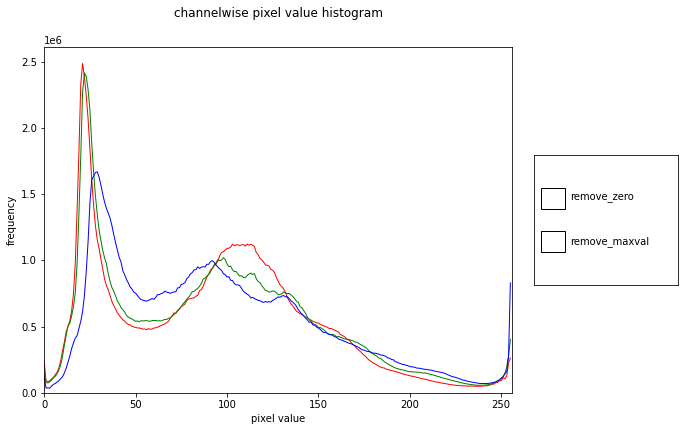

{'dtype': 'uint8',
 'channels': [3],
 'extensions': ['jpg'],
 'min_h': 102,
 'max_h': 650,
 'mean_h': 276.5775,
 'median_h': 252,
 'min_w': 34,
 'max_w': 466,
 'mean_w': 111.763,
 'median_w': 100,
 'mean_hw_ratio': 2.4746785608832975,
 'median_hw_ratio': 2.52,
 'rec_hw_size_8': array([280, 112]),
 'rec_hw_size_16': array([272, 112]),
 'rec_hw_size_32': array([288,  96]),
 'mean': array([0.38409257, 0.39312777, 0.41374138], dtype=float32),
 'std': array([0.24571171, 0.25555196, 0.25309744], dtype=float32)}

In [18]:
from basic_image_eda import BasicImageEDA

data_dir = "./data/train/train1A/"
# BasicImageEDA.explore(data_dir)
extensions = ['png', 'jpg', 'jpeg']
threads = 0
dimension_plot = True
channel_hist = True
nonzero = False
hw_division_factor = 1.0

BasicImageEDA.explore(data_dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)